In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
from MaxPlusDecoder.ShallowAE_maxPlusDecoder.shallowAE_maxplus_NonNeg import NonNeg_ShallowAE_MaxPlus_NonNegConstraint

In [5]:
#Loading FashionMNIST
FILE_PATH = "../"
x_train, _, x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [6]:
results = pd.read_csv("../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03results")
results

,Unnamed: 0,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,100,0.07245,0.277641,0.128724,0.866099,0.072713,0.277447,0.128493,0.863218


In [7]:
test_mse = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_test_errors_100_100.npy')
train_mse = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_training_errors_100_100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_test_max_approx_error_toOriginal_dilation_100_100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_training_max_approx_error_toOriginal_dilatation_100_100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_test_max_approx_error_toRec_dilation_100_100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_training_max_approx_error_toRec_dilatation_100_100.npy')
test_sparsity = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_test_sparsity_100_100.npy')
train_sparsity = np.load('../Results/ShallowAE_MaxPlus/NonNegativity/NonNegConstraint/TestOutputs/18_12_03_training_sparsity_100_100.npy')

Original images and reconstructions - Reconstruction error:  0.07245038356781006


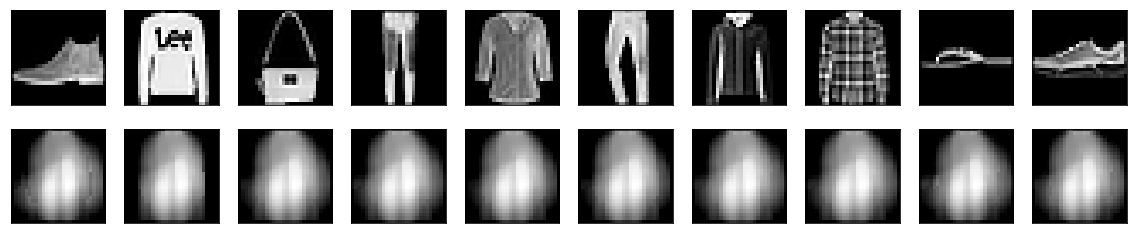

Histograms of the encodings - Sparsity (Hoyer):  0.8660992980003357


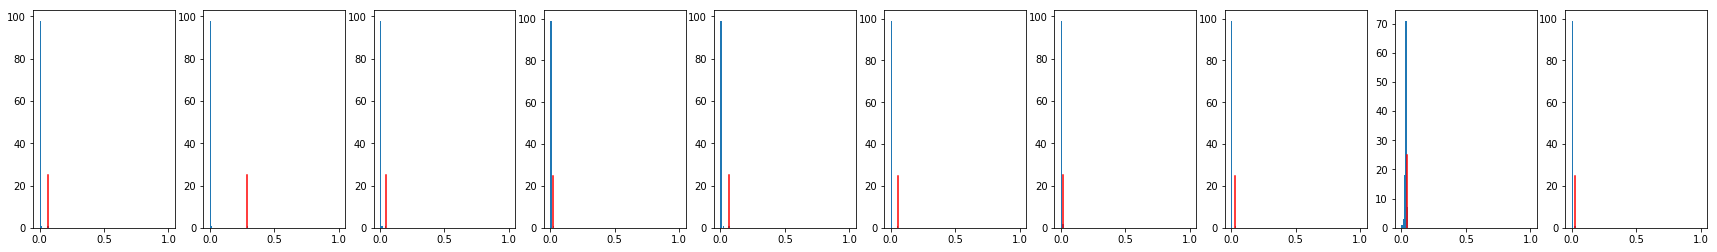

Atom images of the decoder


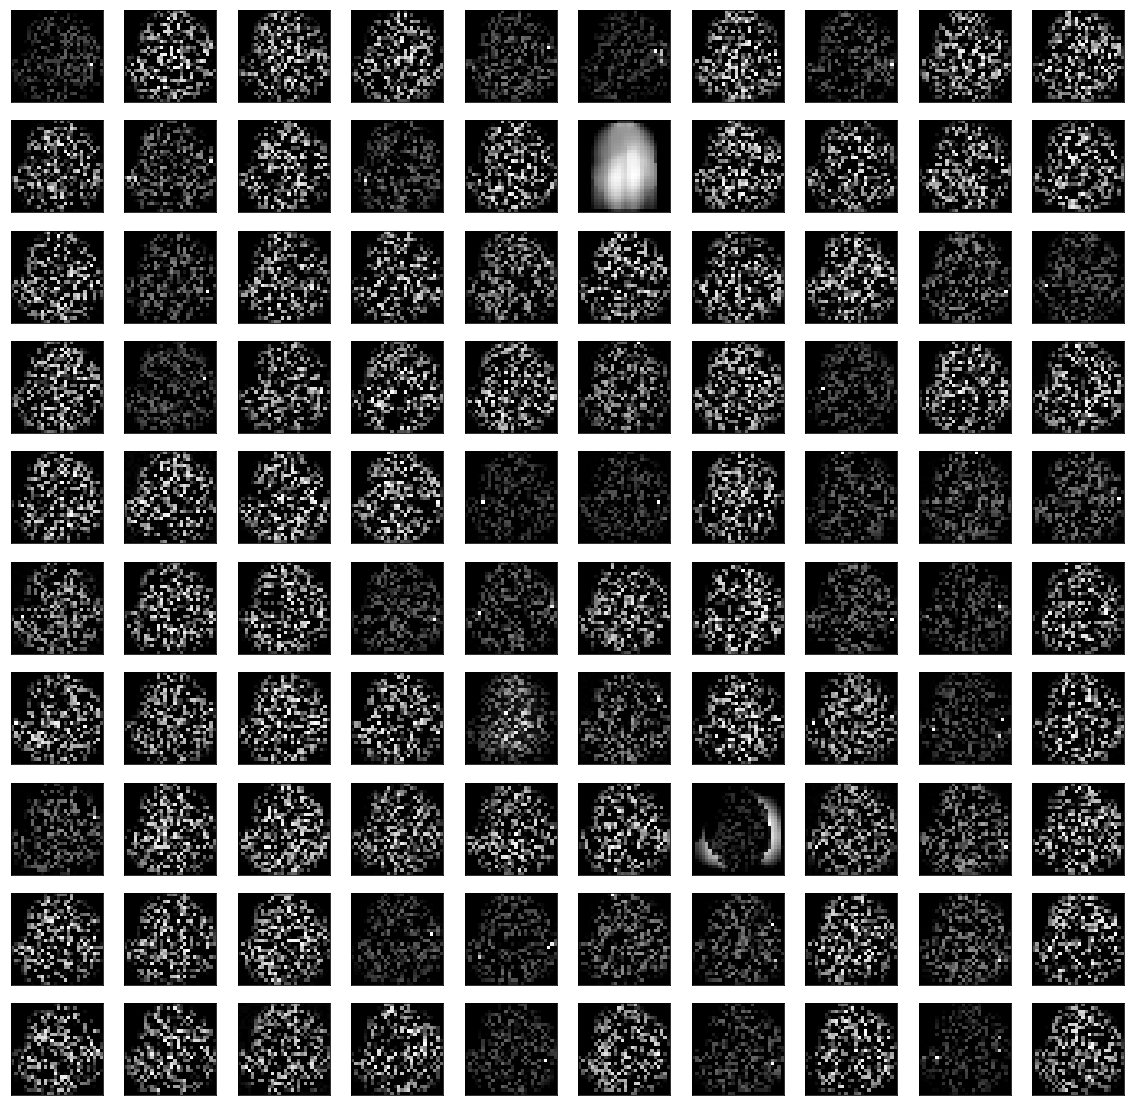

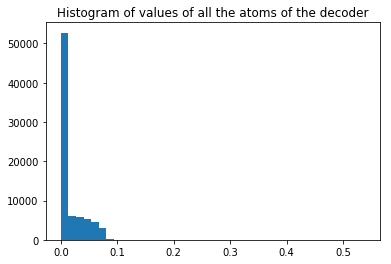

In [8]:
AE = NonNeg_ShallowAE_MaxPlus_NonNegConstraint.load('18_12_03_dim100_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[0])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[0])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=100)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


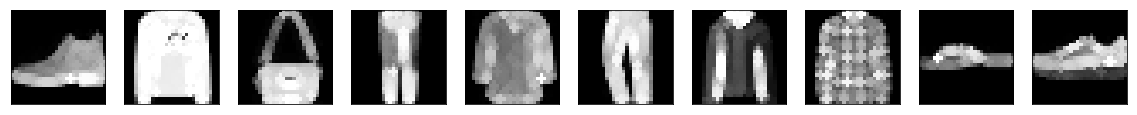

Dilatation of the reconstructions


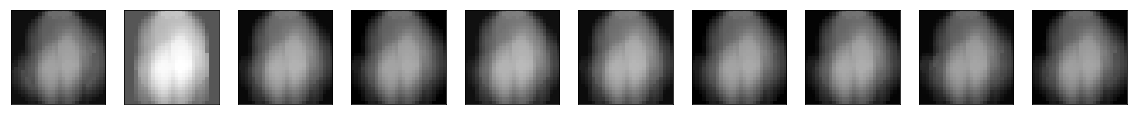

Original images and max-approximation to dilatation
Max-approx error to original:  0.27764141516685487  - Max-approx error to reconstruction:  0.12872370529174804


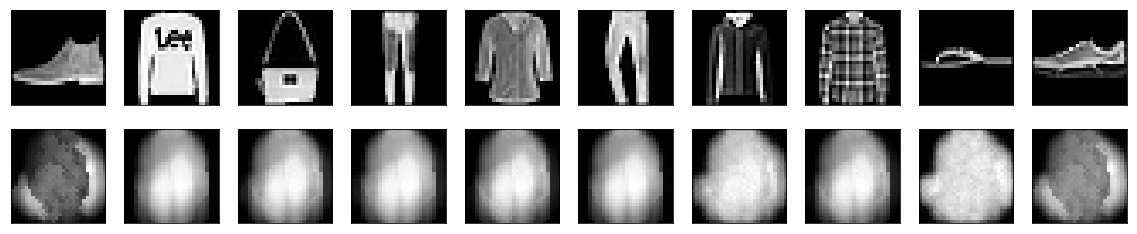

Dilated of the atom images of the decoder


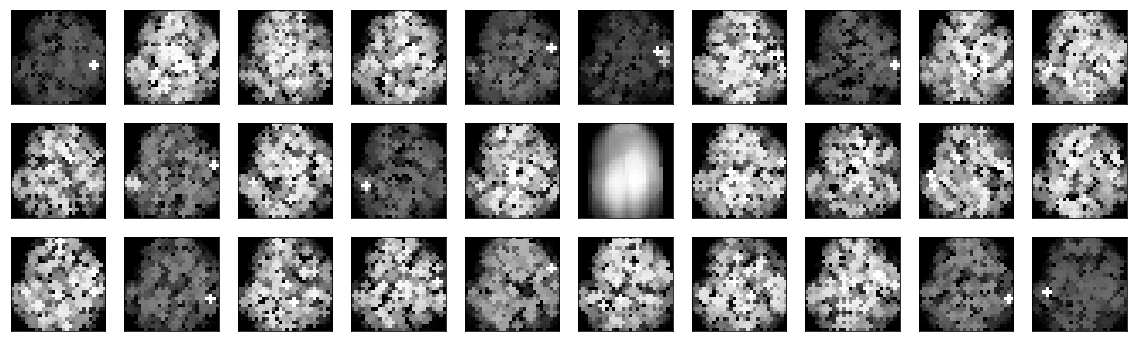

In [9]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[0], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[0])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)